In [1]:
#IMPORTAR LIBRERIAS
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,BatchNormalization,LeakyReLU

In [ ]:
#Ruta
pwd

In [ ]:
# Accede al directorio train y se usa Dataset para los subectorios

In [3]:
imgpath = os.path.join(os.getcwd(),)

images = []
directories = []
dircount = []
cant=0

print("leyendo imagenes de desde: ",imgpath)

for root, dirnames, filenames in os.walk(imgpath, topdown=True):
    
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            img_rgb = plt.imread(filepath)
            images.append(img_rgb)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            
          
    if cant>0:
         print(root, cant)
         directories.append(root)
         dircount.append(cant)
         cant=0

print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))
    


leyendo imagenes de desde:  C:\Users\DavidFlores\Desktop\UIDE\train
C:\Users\DavidFlores\Desktop\UIDE\train\CLASS_02 124
C:\Users\DavidFlores\Desktop\UIDE\train\CLASS_03 426
C:\Users\DavidFlores\Desktop\UIDE\train\CLASS_04 210
C:\Users\DavidFlores\Desktop\UIDE\train\CLASS_05 1898
C:\Users\DavidFlores\Desktop\UIDE\train\CLASS_06 74
C:\Users\DavidFlores\Desktop\UIDE\train\CLASS_07 408
C:\Users\DavidFlores\Desktop\UIDE\train\CLASS_08 126
Directorios leidos: 7
Imagenes en cada directorio [124, 426, 210, 1898, 74, 408, 126]
suma Total de imagenes en subdirs: 3266


In [ ]:
# Numero de etiquetas creadas 7 carpetas

In [55]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
carne=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    carne.append(name[len(name)-1])
    indice=indice+1
 
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  3266
0 CLASS_02
1 CLASS_03
2 CLASS_04
3 CLASS_05
4 CLASS_06
5 CLASS_07
6 CLASS_08
Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [ ]:
# Dividimo en dos conjuntos uno de prueba otro de aprendizaje con el 10% de los datos a prueba

In [5]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

#Normaliza los valores de los píxeles dividiéndolos por 255
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')


Training data shape :  (2939, 216, 384, 3) (2939,)
Testing data shape :  (327, 216, 384, 3) (327,)


In [6]:

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
 
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
 



Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0. 0. 0.]


In [7]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
 
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(2351, 216, 384, 3) (588, 216, 384, 3) (2351, 7) (588, 7)


In [8]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 10 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria
altura, ancho = 216, 384 # altura y ancho de las imagenes


In [ ]:
# Ahora sí que nos apoyamos en Keras para crear la Convolutional Neural Network

In [9]:
carne_model = Sequential()

carne_model.add(Convolution2D(32, kernel_size=(3, 3),activation='linear', padding='same', input_shape=(altura,ancho,3)))
carne_model.add(MaxPooling2D((2, 2),padding='same'))

carne_model.add(Convolution2D(64, kernel_size=(2, 2),activation='linear', padding='same'))
carne_model.add(MaxPooling2D((2, 2),padding='same')) 


carne_model.add(LeakyReLU(alpha=0.1))
carne_model.add(Flatten())
carne_model.add(Dense(256, activation='linear'))
carne_model.add(LeakyReLU(alpha=0.1))
carne_model.add(Dropout(0.5))
carne_model.add(Dense(nClasses, activation='softmax'))


In [10]:
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=10000,
    decay_rate=0.9)
carne_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=lr_schedule),metrics=['accuracy'])

In [ ]:
#Entrenamos la CNN

In [11]:
carne_train = carne_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/10
37/37 [==============================] - 192s 5s/step - loss: 0.9318 - accuracy: 0.7137 - val_loss: 0.5101 - val_accuracy: 0.8316
Epoch 2/10
37/37 [==============================] - 200s 5s/step - loss: 0.2472 - accuracy: 0.9277 - val_loss: 0.3579 - val_accuracy: 0.8895
Epoch 3/10
37/37 [==============================] - 180s 5s/step - loss: 0.1054 - accuracy: 0.9685 - val_loss: 0.3965 - val_accuracy: 0.9048
Epoch 4/10
37/37 [==============================] - 197s 5s/step - loss: 0.0789 - accuracy: 0.9775 - val_loss: 0.3859 - val_accuracy: 0.9184
Epoch 5/10
37/37 [==============================] - 180s 5s/step - loss: 0.0724 - accuracy: 0.9783 - val_loss: 0.4048 - val_accuracy: 0.9014
Epoch 6/10
37/37 [==============================] - 174s 5s/step - loss: 0.0637 - accuracy: 0.9826 - val_loss: 0.3931 - val_accuracy: 0.9116
Epoch 7/10
37/37 [==============================] - 183s 5s/step - loss: 0.0528 - accuracy: 0.9843 - val_loss: 0.4413 - val_accuracy: 0.9184
Epoch 8/10
37

In [ ]:
#Evaluamos el modelo

In [12]:
test_eval = carne_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

11/11 [==============================] - 5s 403ms/step - loss: 0.5335 - accuracy: 0.9052
Test loss: 0.5334655046463013
Test accuracy: 0.9051987528800964


In [ ]:
# Matrix de confusión

11/11 [==============================] - 5s 408ms/step


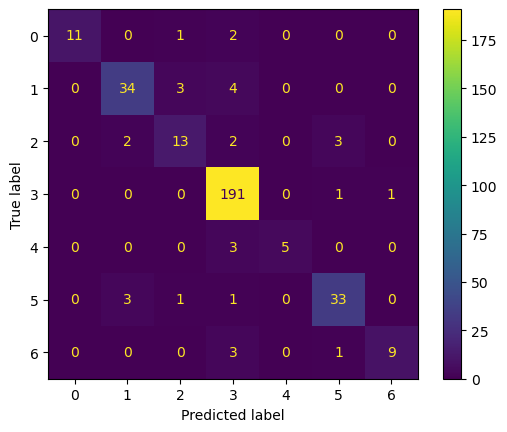

In [18]:
predicted_classes=[]
predicted_classes2 = carne_model.predict(test_X)

for predicted_carne in predicted_classes2:
    predicted_classes.append(predicted_carne.tolist().index(max(predicted_carne)))
predicted_classes=np.array(predicted_classes)

confusion_matrix = metrics.confusion_matrix(test_Y, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()

In [ ]:
# Hacemos pruebas con la matriz test

In [56]:
from skimage.transform import resize

images=[]

filenames = ['C:/Users/DavidFlores/Desktop/UIDE/test/CLASS_02/05-CAPTURE_20220421_053715_321.png', 
             'C:/Users/DavidFlores/Desktop/UIDE/test/CLASS_04/05-CAPTURE_20220421_053420_484.png']
for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (altura, ancho),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

array_images = np.array(images)
test_images = array_images.astype('float32')

predictions = carne_model.predict(test_images)

if isinstance(filenames, list):
    for i, img_tagged in enumerate(predictions):
        print(filenames[i],' prediccion =>' ,carne[img_tagged.tolist().index(max(img_tagged))])

1/1 [==============================] - 0s 194ms/step
C:/Users/DavidFlores/Desktop/UIDE/test/CLASS_02/05-CAPTURE_20220421_053715_321.png  prediccion => CLASS_04
C:/Users/DavidFlores/Desktop/UIDE/test/CLASS_04/05-CAPTURE_20220421_053420_484.png  prediccion => CLASS_04
